In [4]:
import pandas as pd

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Preparation

In [35]:
df = pd.read_csv("diabetes.csv")
df.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Exploration

In [38]:
print("Data Overview:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunctio

### Summary Statistics

In [39]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

### Visualizing target variable

In [43]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [47]:
df.rename(columns={'Diabetes': 'diabetes'}, inplace=True)

In [49]:
df.columns = df.columns.str.strip()

In [50]:
print(df.head())
print(df.shape) 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [52]:
column_name = [col for col in df.columns if 'diabetes' in col.lower()]
if column_name:
    df['diabetes'] = df[column_name[0]]
    print(df['diabetes'].dtype)
    print(df['diabetes'].unique())
else:
    print("Error: 'diabetes' column not found!")


float64
[0.627 0.351 0.672 0.167 2.288 0.201 0.248 0.134 0.158 0.232 0.191 0.537
 1.441 0.398 0.587 0.484 0.551 0.254 0.183 0.529 0.704 0.388 0.451 0.263
 0.205 0.257 0.487 0.245 0.337 0.546 0.851 0.267 0.188 0.512 0.966 0.42
 0.665 0.503 1.39  0.271 0.696 0.235 0.721 0.294 1.893 0.564 0.586 0.344
 0.305 0.491 0.526 0.342 0.467 0.718 0.962 1.781 0.173 0.304 0.27  0.699
 0.258 0.203 0.855 0.845 0.334 0.189 0.867 0.411 0.583 0.231 0.396 0.14
 0.391 0.37  0.307 0.102 0.767 0.237 0.227 0.698 0.178 0.324 0.153 0.165
 0.443 0.261 0.277 0.761 0.255 0.13  0.323 0.356 0.325 1.222 0.179 0.262
 0.283 0.93  0.801 0.207 0.287 0.336 0.247 0.199 0.543 0.192 0.588 0.539
 0.22  0.654 0.223 0.759 0.26  0.404 0.186 0.278 0.496 0.452 0.403 0.741
 0.361 1.114 0.457 0.647 0.088 0.597 0.532 0.703 0.159 0.268 0.286 0.318
 0.272 0.572 0.096 1.4   0.218 0.085 0.399 0.432 1.189 0.687 0.137 0.637
 0.833 0.229 0.817 0.204 0.368 0.743 0.722 0.256 0.709 0.471 0.495 0.18
 0.542 0.773 0.678 0.719 0.382 0.319 0.19  0.9

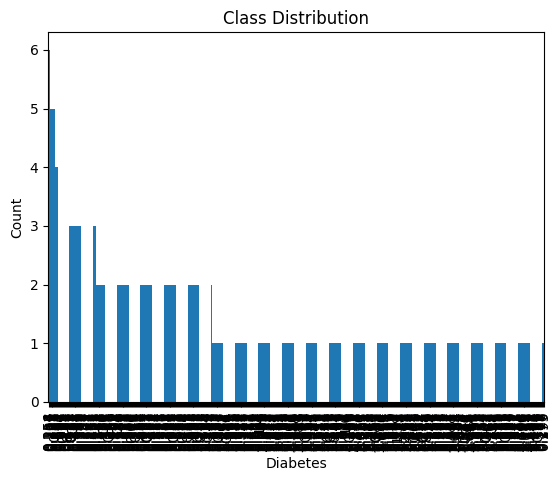

In [53]:
df['diabetes'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

### Data Quality and Integrity Check

Summary Statistics:
             BMI  BloodGlucose      HbA1c
count  13.000000     13.000000  13.000000
mean   30.769231    118.461538   6.438462
std    11.069130     32.492603   1.050031
min    18.000000     80.000000   4.900000
25%    24.000000     95.000000   5.800000
50%    28.000000    115.000000   6.300000
75%    32.000000    130.000000   7.000000
max    60.000000    200.000000   9.000000

Count of Negative Values (should be 0 if values are expected to be positive):
BMI             0
BloodGlucose    0
HbA1c           0
dtype: int64


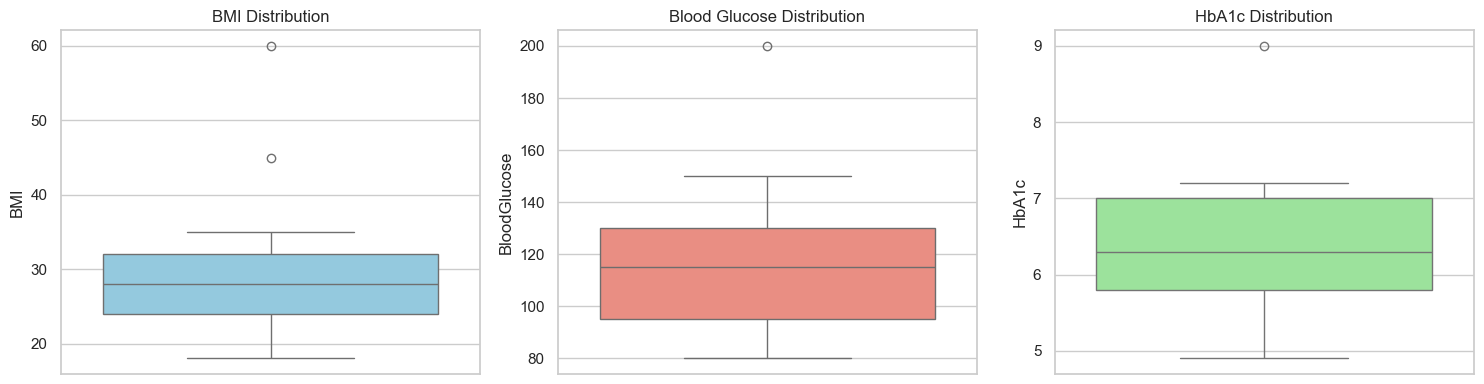


BMI Outliers:
11    60
12    45
Name: BMI, dtype: int64
Lower Bound: 12.00, Upper Bound: 44.00

BloodGlucose Outliers:
11    200
Name: BloodGlucose, dtype: int64
Lower Bound: 42.50, Upper Bound: 182.50

HbA1c Outliers:
11    9.0
Name: HbA1c, dtype: float64
Lower Bound: 4.00, Upper Bound: 8.80


In [44]:
data = {
    'BMI': [22, 27, 32, 24, 29, 31, 35, 26, 23, 28, 18, 60, 45],
    'BloodGlucose': [90, 110, 130, 95, 120, 140, 150, 100, 115, 125, 80, 200, 85],
    'HbA1c': [5.5, 6.0, 7.2, 5.8, 6.5, 7.0, 7.2, 6.1, 5.4, 6.3, 4.9, 9.0, 6.8]
}
df = pd.DataFrame(data)
print("Summary Statistics:")
print(df.describe())
print("\nCount of Negative Values (should be 0 if values are expected to be positive):")
print((df < 0).sum())
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['BMI'], color='skyblue')
plt.title("BMI Distribution")

plt.subplot(1, 3, 2)
sns.boxplot(y=df['BloodGlucose'], color='salmon')
plt.title("Blood Glucose Distribution")

plt.subplot(1, 3, 3)
sns.boxplot(y=df['HbA1c'], color='lightgreen')
plt.title("HbA1c Distribution")

plt.tight_layout()
plt.show()
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

features = ['BMI', 'BloodGlucose', 'HbA1c']
for feature in features:
    outliers, lower, upper = find_outliers(df[feature])
    print(f"\n{feature} Outliers:")
    print(outliers)
    print(f"Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")


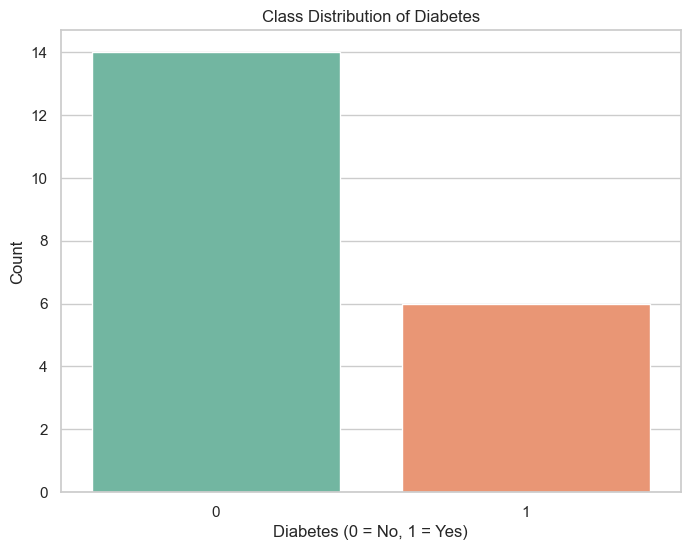

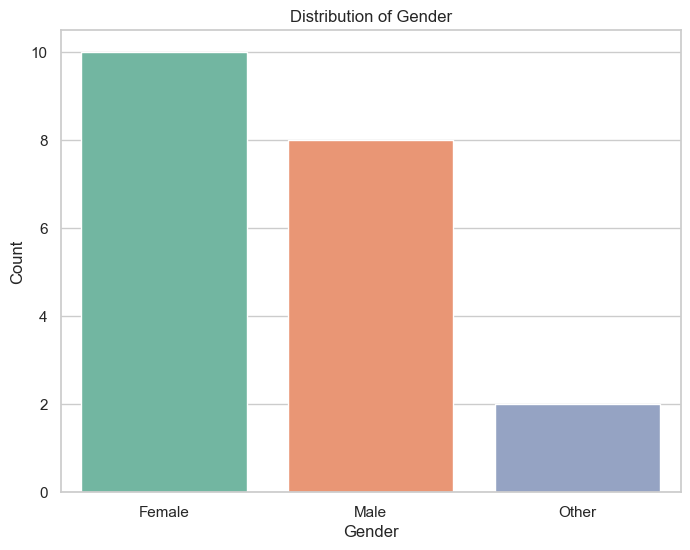

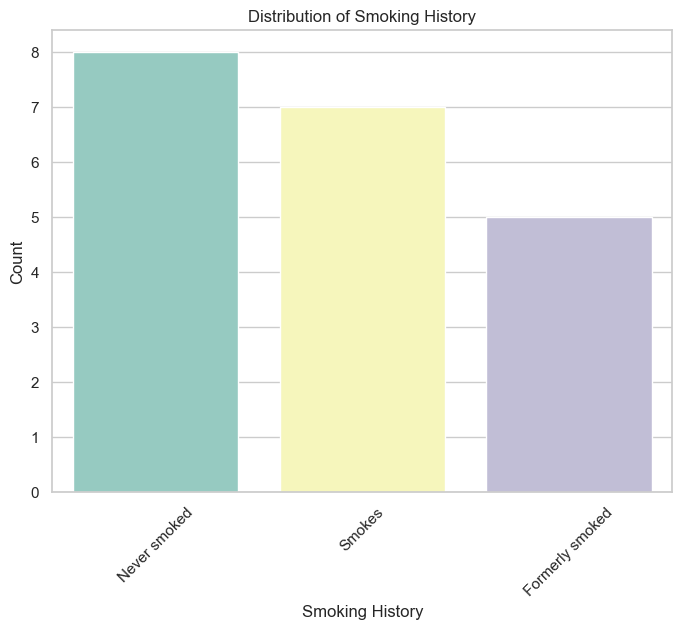

In [48]:
data = {
    'Diabetes': [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 
               'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 
               'Other', 'Male', 'Female', 'Other', 'Female', 'Male', 'Female', 'Male'],
    'SmokingHistory': ['Never smoked', 'Smokes', 'Formerly smoked', 'Never smoked', 
                       'Smokes', 'Never smoked', 'Formerly smoked', 'Never smoked', 
                       'Smokes', 'Formerly smoked', 'Never smoked', 'Smokes', 
                       'Never smoked', 'Formerly smoked', 'Smokes', 'Never smoked', 
                       'Smokes', 'Formerly smoked', 'Never smoked', 'Smokes']
}
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Diabetes', data=df, hue='Diabetes', palette='Set2', dodge=False)
if ax.get_legend():
    ax.get_legend().remove()
plt.title("Class Distribution of Diabetes")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', data=df, hue='Gender', palette='Set2', dodge=False)
if ax.get_legend():
    ax.get_legend().remove()
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='SmokingHistory', data=df, hue='SmokingHistory', palette='Set3', dodge=False)
if ax.get_legend():
    ax.get_legend().remove()
plt.title("Distribution of Smoking History")
plt.xlabel("Smoking History")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Class Counts:
Diabetes
0    14
1     6
Name: count, dtype: int64

Class Percentages:
Diabetes
0    70.0
1    30.0
Name: proportion, dtype: float64


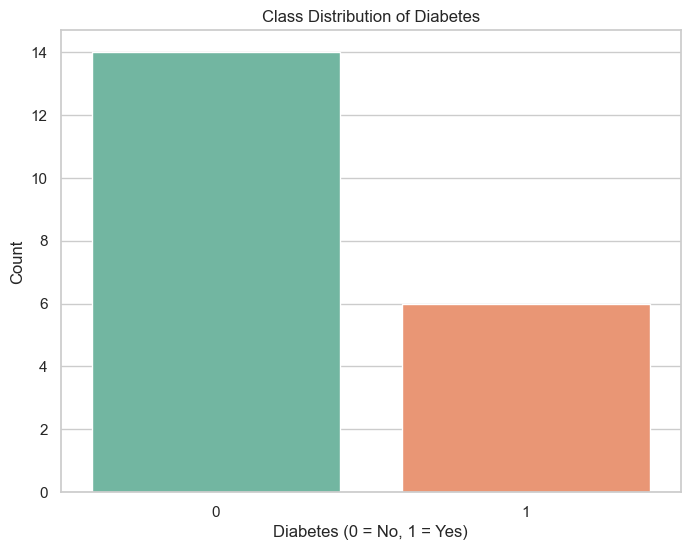

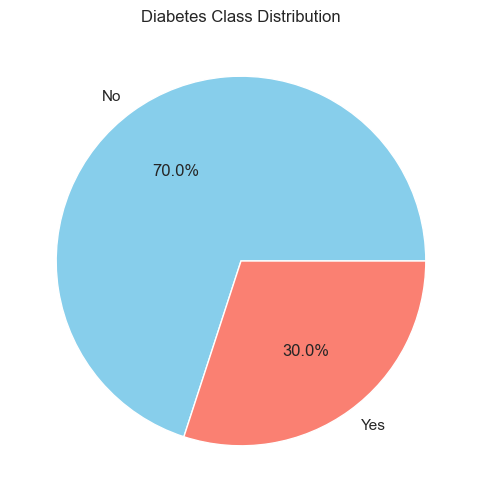

In [47]:
data = {
    'Diabetes': [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
}
df = pd.DataFrame(data)
class_counts = df['Diabetes'].value_counts()
class_percentages = df['Diabetes'].value_counts(normalize=True) * 100

print("Class Counts:")
print(class_counts)
print("\nClass Percentages:")
print(class_percentages)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Diabetes', data=df, hue='Diabetes', palette='Set2', dodge=False)
if ax.get_legend():
    ax.get_legend().remove()
plt.title("Class Distribution of Diabetes")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=["No", "Yes"], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Diabetes Class Distribution")
plt.show()


### Univariate Analysis

In [55]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'diabetes'],
      dtype='object')


In [56]:
df.rename(columns={'Hba1c Level': 'HbA1c_level'}, inplace=True)

In [57]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
diabetes                    0
dtype: int64


In [58]:
df.fillna(df.median(), inplace=True)

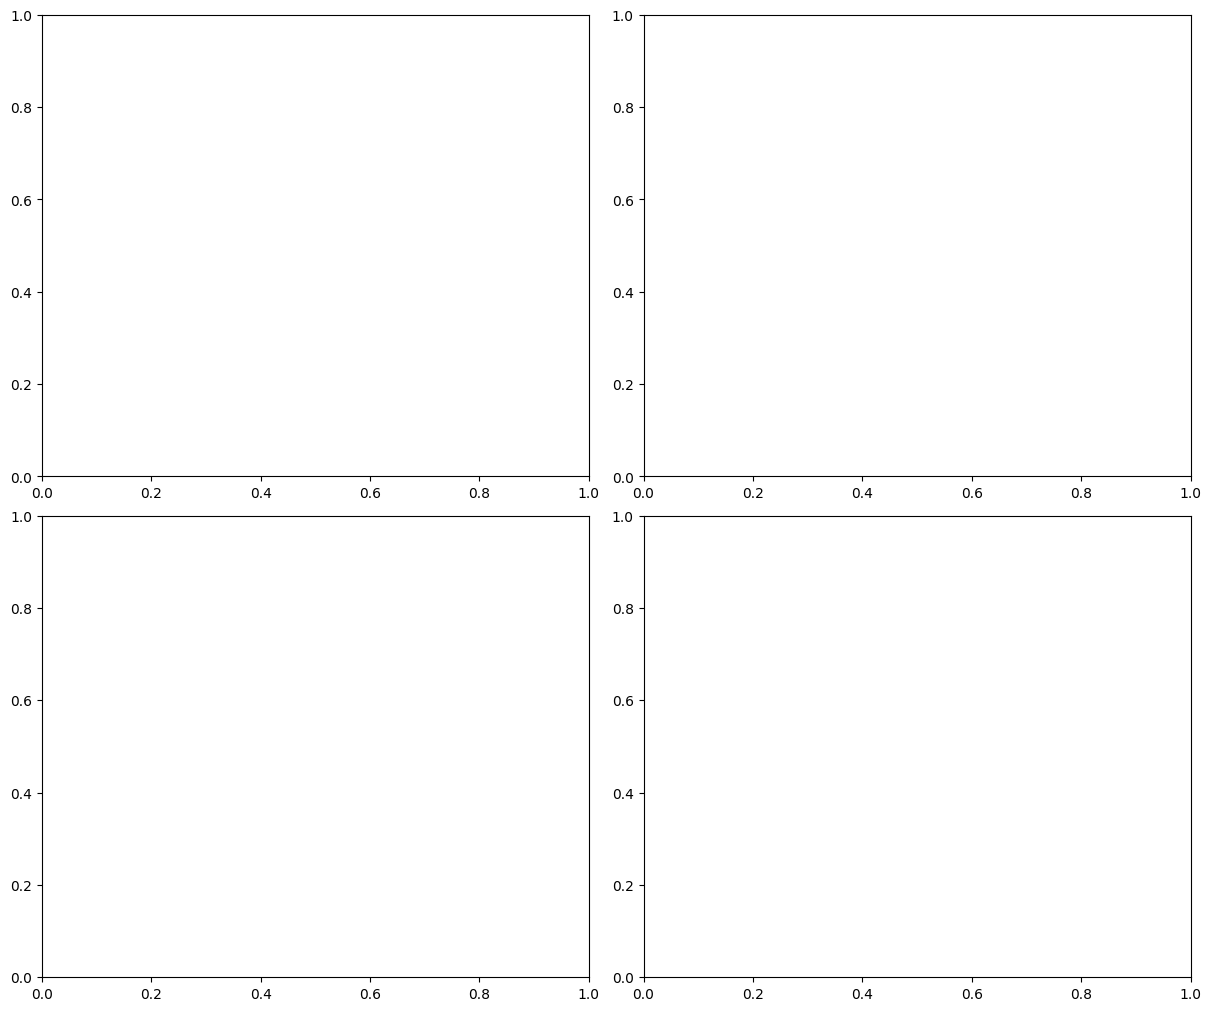

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

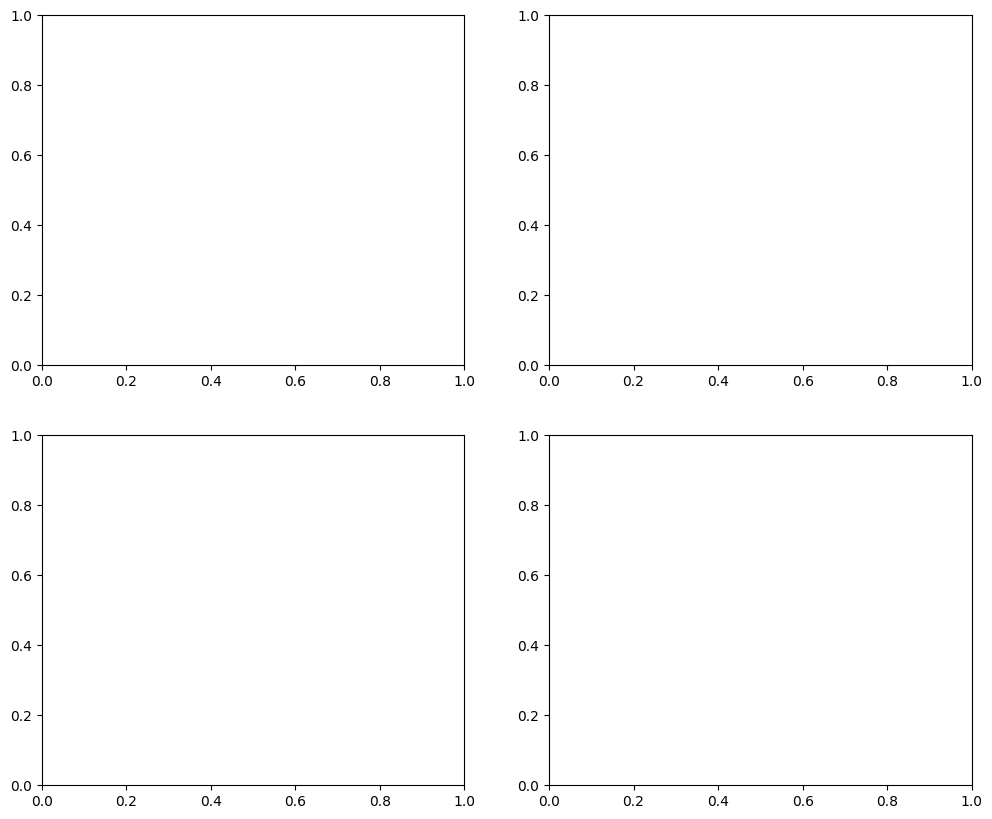

In [60]:
columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, col in zip(axes.flat, columns):
    if col in df.columns:
        sns.histplot(df[col], bins=30, kde=True, ax=ax).set_title(f'{col} Distribution')

plt.show()


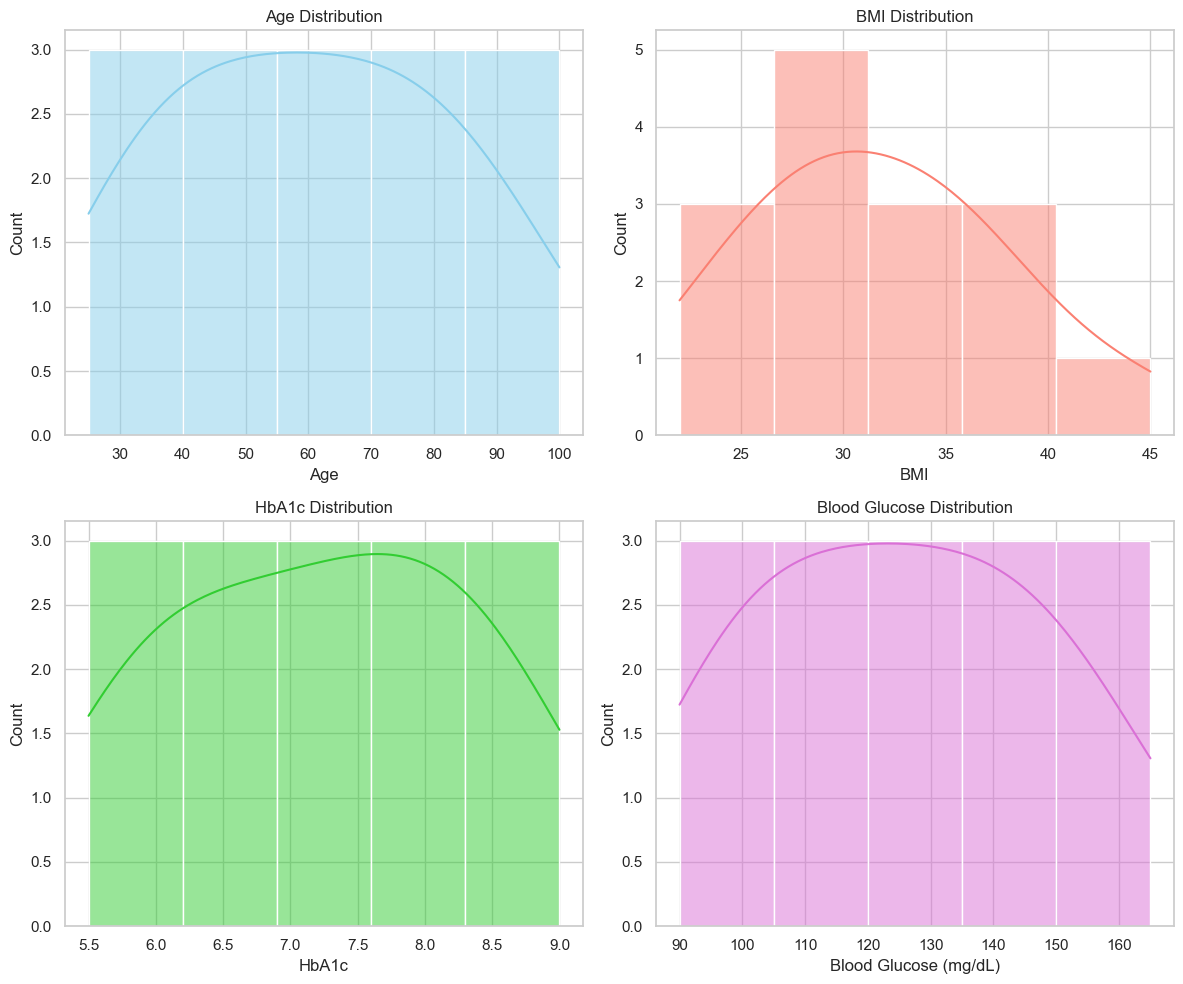

In [19]:
data = {
    'Age': [25, 35, 45, 55, 65, 75, 85, 30, 40, 50, 60, 70, 80, 90, 100],
    'BMI': [22, 28, 33, 26, 29, 35, 38, 23, 30, 34, 27, 31, 36, 40, 45],
    'HbA1c': [5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 5.7, 6.2, 6.8, 7.3, 7.8, 8.1, 8.6, 9.0],
    'BloodGlucose': [90, 100, 110, 120, 130, 140, 150, 95, 105, 115, 125, 135, 145, 155, 165]
}

df = pd.DataFrame(data)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['Age'], kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
sns.histplot(df['BMI'], kde=True, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
sns.histplot(df['HbA1c'], kde=True, ax=axes[1, 0], color="limegreen")
axes[1, 0].set_title('HbA1c Distribution')
axes[1, 0].set_xlabel('HbA1c')
sns.histplot(df['BloodGlucose'], kde=True, ax=axes[1, 1], color="orchid")
axes[1, 1].set_title('Blood Glucose Distribution')
axes[1, 1].set_xlabel('Blood Glucose (mg/dL)')

plt.tight_layout()
plt.show()


In [73]:
print(df.shape)
print(df.head()) 

(768, 10)
   pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   diabetespedigreefunction  age  outcome  diabetes  
0                     0.627   50        1     0.627  
1                     0.351   31        0     0.351  
2                     0.672   32        1     0.672  
3                     0.167   21        0     0.167  
4                     2.288   33        1     2.288  


    Age  BMI  HbA1c  BloodGlucose BMI_Category
0    25   16    5.5            90  Underweight
1    35   22    6.0           100       Normal
2    45   27    6.5           110   Overweight
3    55   31    7.0           120        Obese
4    65   24    7.5           130       Normal
5    75   29    8.0           140   Overweight
6    85   34    8.5           150        Obese
7    30   20    5.7            95       Normal
8    40   26    6.2           105   Overweight
9    50   30    6.8           115        Obese
10   60   28    7.3           125   Overweight
11   70   33    7.8           135        Obese
12   80   35    8.1           145        Obese
13   90   32    8.6           155        Obese
14  100   18    9.0           165  Underweight


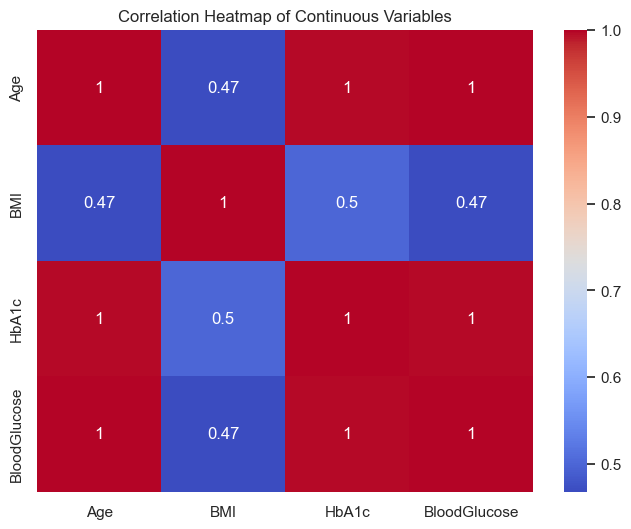

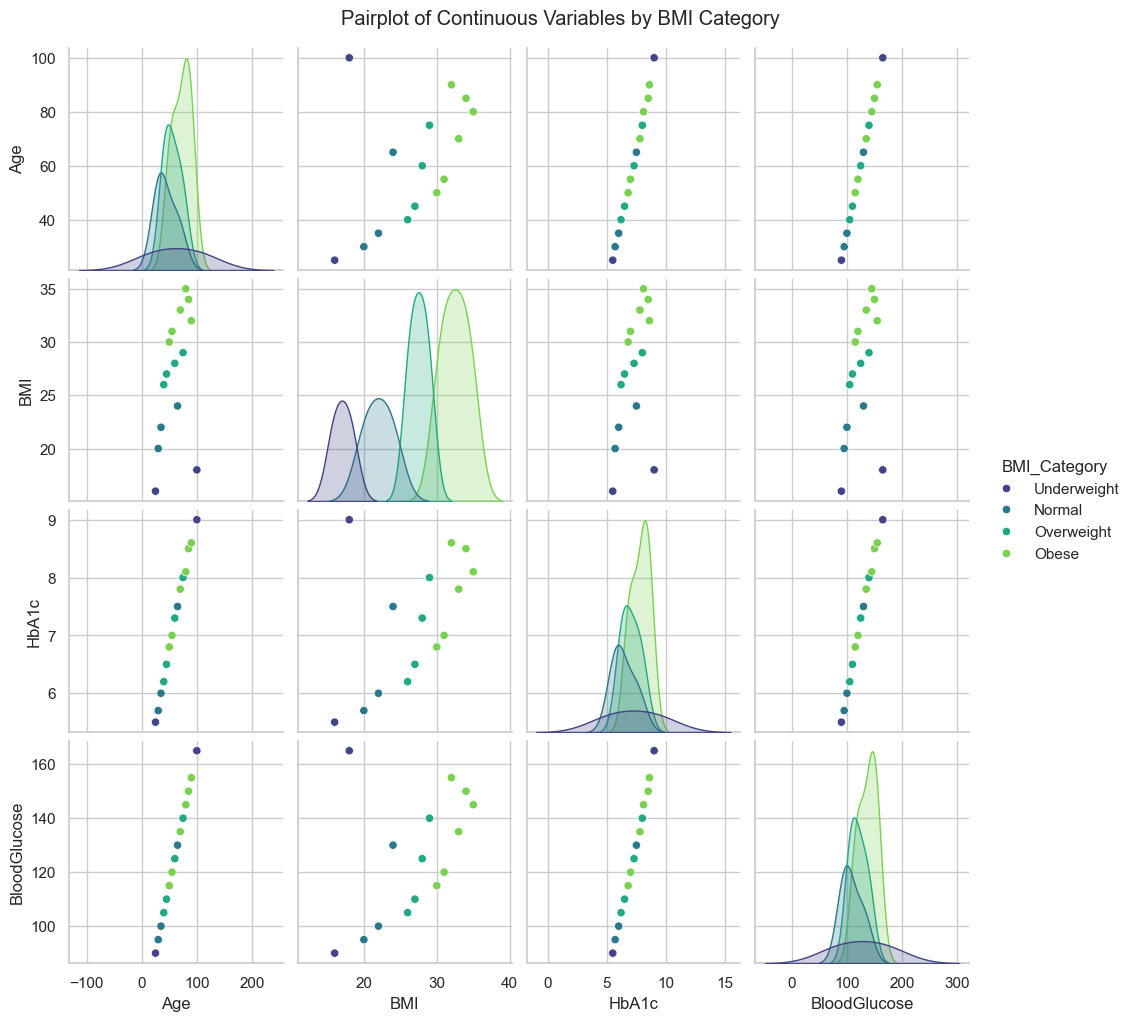

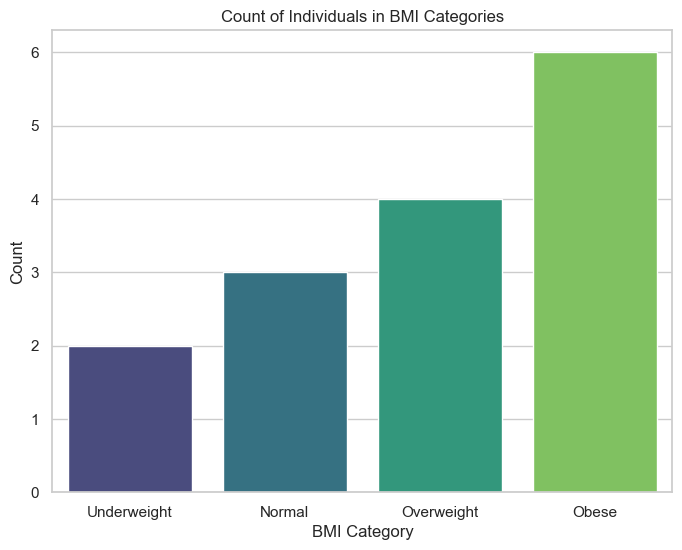

In [49]:
data = {
    'Age': [25, 35, 45, 55, 65, 75, 85, 30, 40, 50, 60, 70, 80, 90, 100],
    'BMI': [16, 22, 27, 31, 24, 29, 34, 20, 26, 30, 28, 33, 35, 32, 18],
    'HbA1c': [5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 5.7, 6.2, 6.8, 7.3, 7.8, 8.1, 8.6, 9.0],
    'BloodGlucose': [90, 100, 110, 120, 130, 140, 150, 95, 105, 115, 125, 135, 145, 155, 165]
}
df = pd.DataFrame(data)
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)
print(df)
corr = df[['Age', 'BMI', 'HbA1c', 'BloodGlucose']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()
sns.pairplot(df, vars=['Age', 'BMI', 'HbA1c', 'BloodGlucose'], hue='BMI_Category', palette='viridis')
plt.suptitle("Pairplot of Continuous Variables by BMI Category", y=1.02)
plt.show()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='BMI_Category', data=df, hue='BMI_Category', palette="viridis", dodge=False)
if ax.get_legend() is not None:
    ax.get_legend().remove()  # Remove the redundant legend
plt.title("Count of Individuals in BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()


## Bivariate Analysis

In [80]:
print(df.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [82]:
print(df.columns.str.lower())

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')


In [83]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


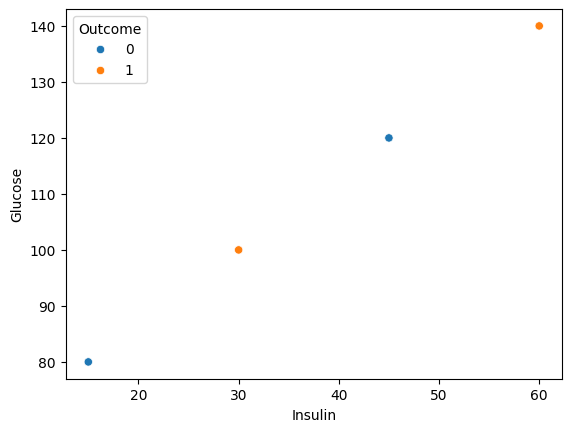

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {
    'Insulin': [15, 30, 45, 60],
    'Glucose': [80, 100, 120, 140],
    'Outcome': [0, 1, 0, 1]
}
df = pd.DataFrame(data)
sns.scatterplot(data=df, x="Insulin", y="Glucose", hue="Outcome")
plt.show()


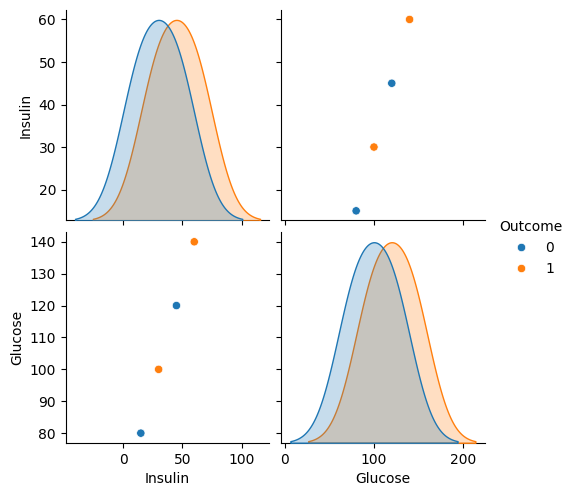

In [10]:
sns.pairplot(df,hue='Outcome')

<Axes: >

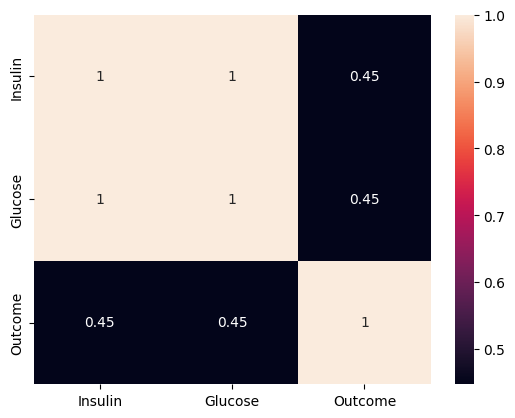

In [12]:
corr = df.corr(method='spearman')
sns.heatmap(corr, annot=True)

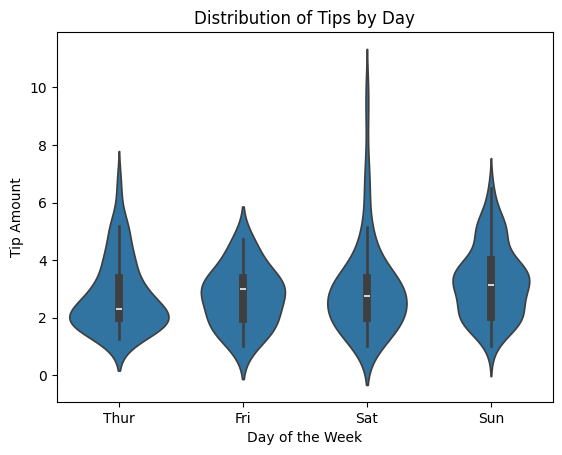

In [13]:
tips = sns.load_dataset("tips")
sns.violinplot(x="day", y="tip", data=tips)
plt.title("Distribution of Tips by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Tip Amount")
plt.show()

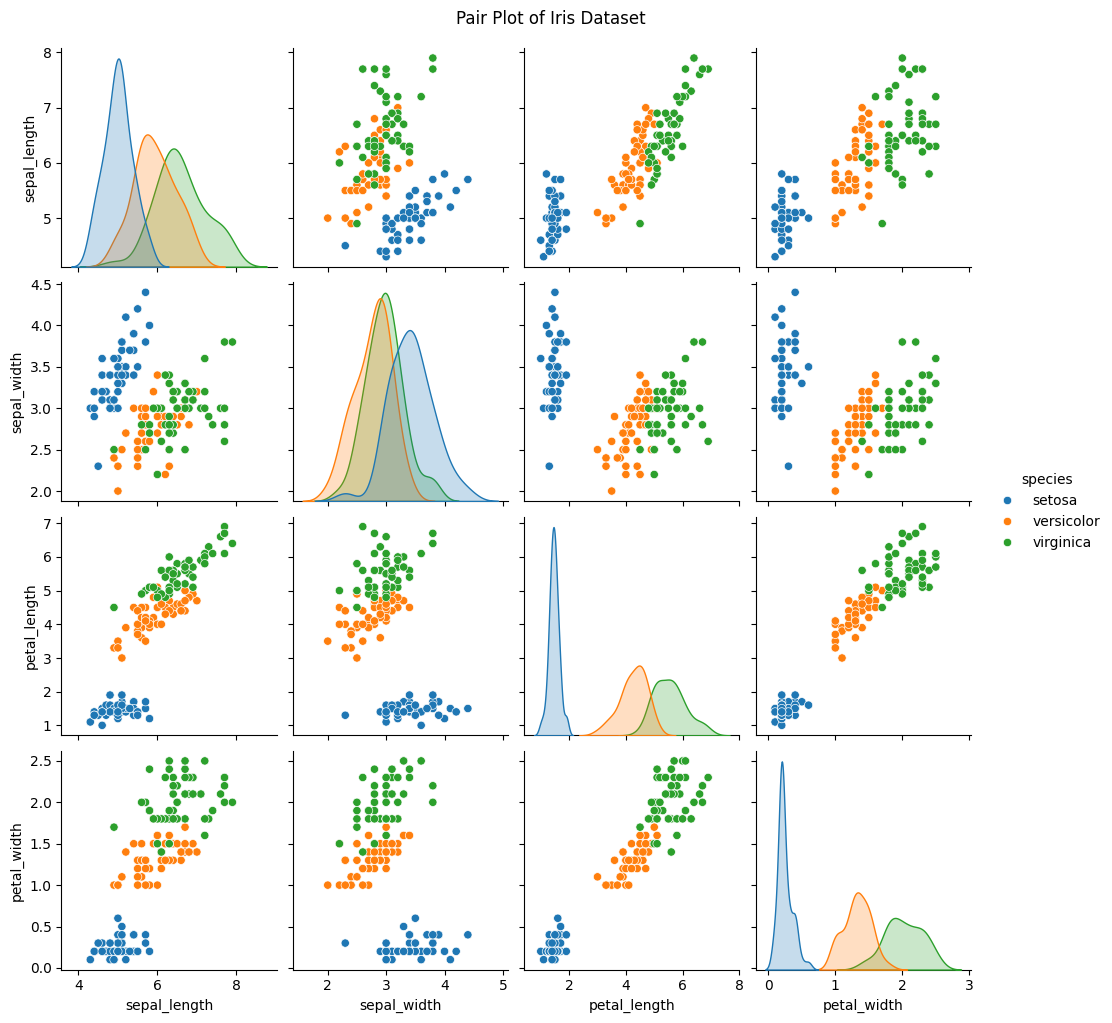

In [14]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

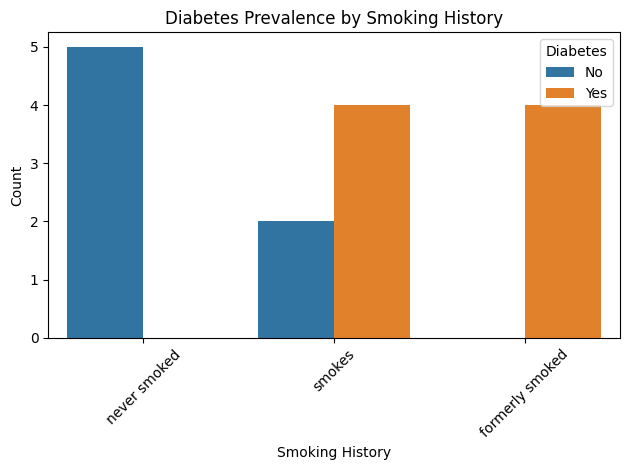

In [15]:
data = {
    'SmokingHistory': [
        'never smoked', 'smokes', 'formerly smoked', 'smokes', 'never smoked',
        'formerly smoked', 'smokes', 'never smoked', 'smokes', 'formerly smoked',
        'smokes', 'never smoked', 'formerly smoked', 'smokes', 'never smoked'
    ],
    'Diabetes': [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]
}

df = pd.DataFrame(data)
sns.countplot(x='SmokingHistory', hue='Diabetes', data=df)
plt.title("Diabetes Prevalence by Smoking History")
plt.xlabel("Smoking History")
plt.ylabel("Count")
plt.legend(title="Diabetes", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

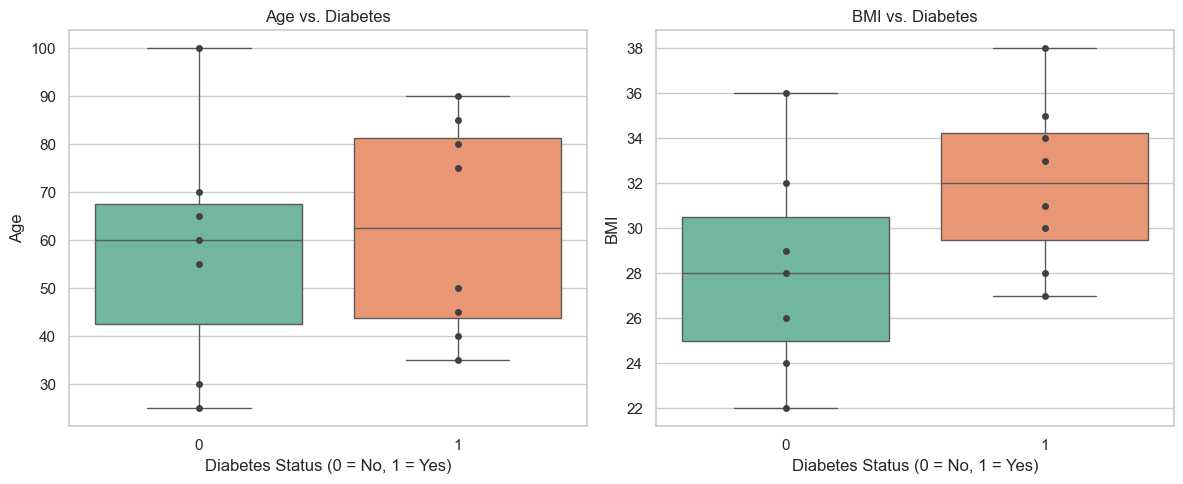

In [51]:
data = {
    'Age': [25, 35, 45, 55, 65, 75, 85, 30, 40, 50, 60, 70, 80, 90, 100],
    'BMI': [22, 28, 33, 26, 29, 35, 38, 24, 27, 31, 28, 32, 34, 30, 36],
    'Diabetes': [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]
}
df = pd.DataFrame(data)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(x='Diabetes', y='Age', data=df, hue='Diabetes', palette="Set2", dodge=False)
sns.swarmplot(x='Diabetes', y='Age', data=df, color=".25")
if ax1.get_legend():
    ax1.get_legend().remove()
plt.title("Age vs. Diabetes")
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.subplot(1, 2, 2)
ax2 = sns.boxplot(x='Diabetes', y='BMI', data=df, hue='Diabetes', palette="Set2", dodge=False)
sns.swarmplot(x='Diabetes', y='BMI', data=df, color=".25")
if ax2.get_legend():
    ax2.get_legend().remove()
plt.title("BMI vs. Diabetes")
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("BMI")

plt.tight_layout()
plt.show()


    Age  BMI  HbA1c  BloodGlucose BMI_Category  Diabetes
0    25   16    5.5            90  Underweight         1
1    35   22    6.0           100       Normal         0
2    45   27    6.5           110   Overweight         0
3    55   31    7.0           120        Obese         1
4    65   24    7.5           130       Normal         1
5    75   29    8.0           140   Overweight         0
6    85   34    8.5           150        Obese         1
7    30   20    5.7            95       Normal         0
8    40   26    6.2           105   Overweight         0
9    50   30    6.8           115        Obese         1
10   60   28    7.3           125   Overweight         0
11   70   33    7.8           135        Obese         1
12   80   35    8.1           145        Obese         1
13   90   32    8.6           155        Obese         1
14  100   18    9.0           165  Underweight         0


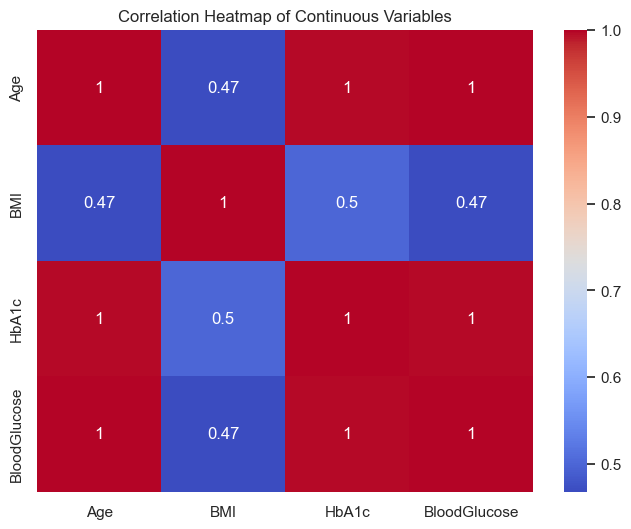

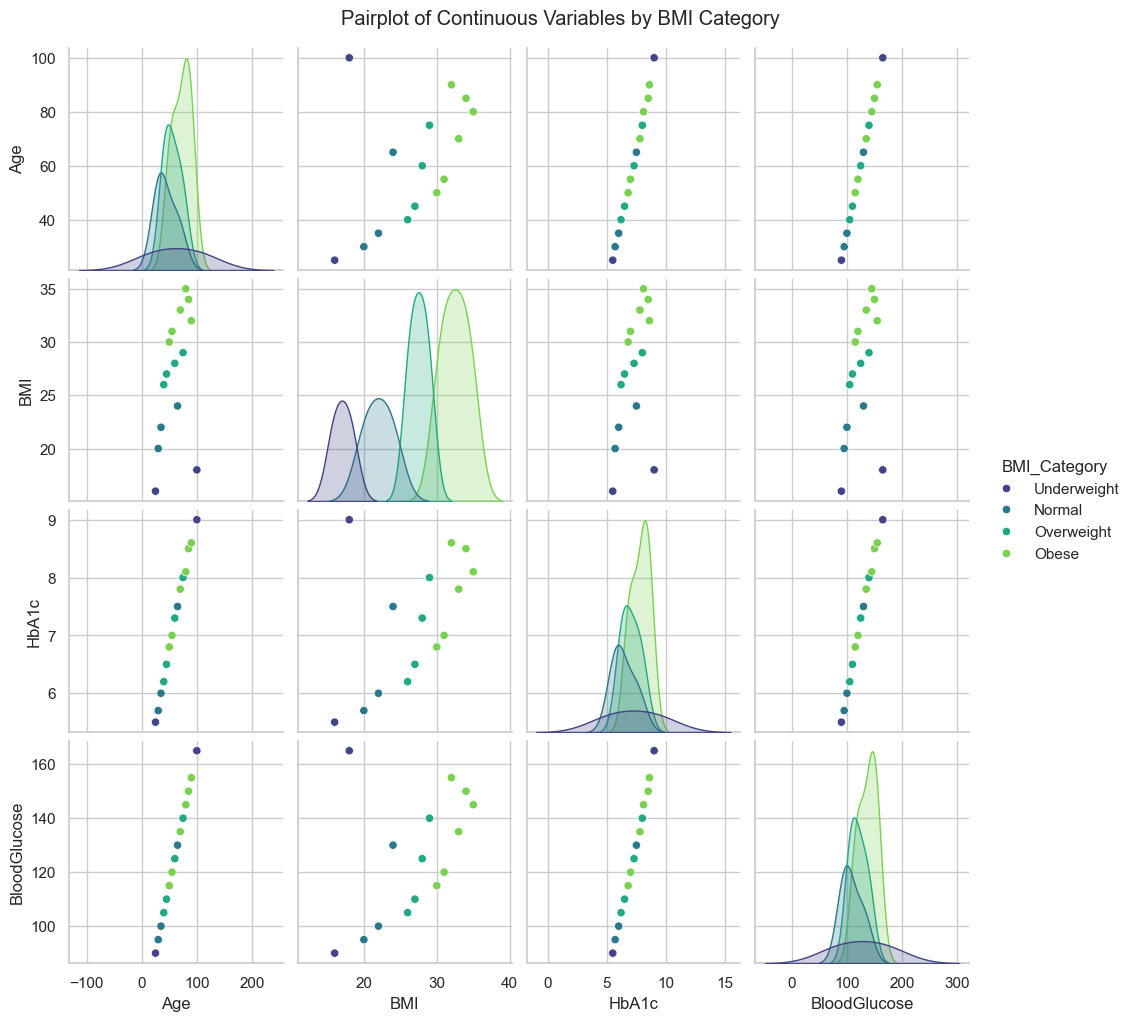

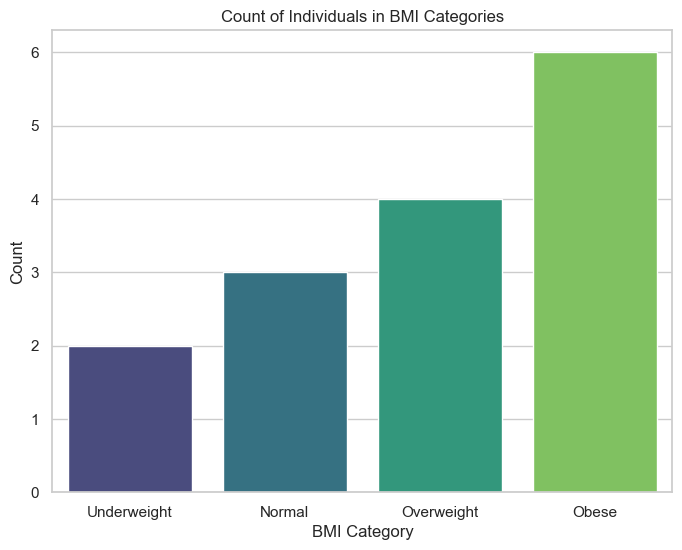

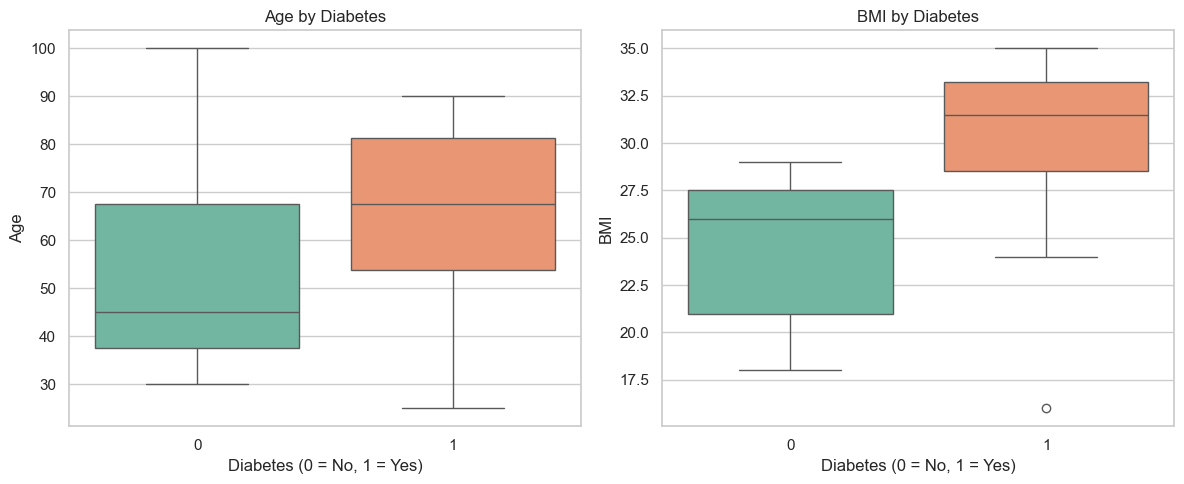

In [50]:
data = {
    'Age': [25, 35, 45, 55, 65, 75, 85, 30, 40, 50, 60, 70, 80, 90, 100],
    'BMI': [16, 22, 27, 31, 24, 29, 34, 20, 26, 30, 28, 33, 35, 32, 18],
    'HbA1c': [5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 5.7, 6.2, 6.8, 7.3, 7.8, 8.1, 8.6, 9.0],
    'BloodGlucose': [90, 100, 110, 120, 130, 140, 150, 95, 105, 115, 125, 135, 145, 155, 165]
}
df = pd.DataFrame(data)
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)
df['Diabetes'] = np.random.choice([0, 1], size=len(df))

print(df)
corr = df[['Age', 'BMI', 'HbA1c', 'BloodGlucose']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()
sns.pairplot(df, vars=['Age', 'BMI', 'HbA1c', 'BloodGlucose'], hue='BMI_Category', palette='viridis')
plt.suptitle("Pairplot of Continuous Variables by BMI Category", y=1.02)
plt.show()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='BMI_Category', data=df, hue='BMI_Category', palette="viridis", dodge=False)
if ax.get_legend() is not None:
    ax.get_legend().remove()  # Remove the redundant legend
plt.title("Count of Individuals in BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ax = sns.boxplot(x='Diabetes', y='Age', data=df, hue='Diabetes', palette="Set2", dodge=False)
if ax.get_legend() is not None:
    ax.get_legend().remove()
plt.title("Age by Diabetes")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.subplot(1, 2, 2)
ax = sns.boxplot(x='Diabetes', y='BMI', data=df, hue='Diabetes', palette="Set2", dodge=False)
if ax.get_legend() is not None:
    ax.get_legend().remove()
plt.title("BMI by Diabetes")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("BMI")

plt.tight_layout()
plt.show()


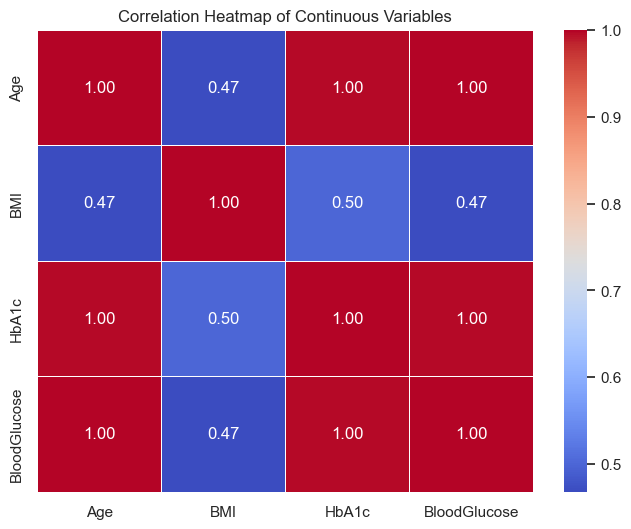

In [21]:
data = {
    'Age': [25, 35, 45, 55, 65, 75, 85, 30, 40, 50, 60, 70, 80, 90, 100],
    'BMI': [16, 22, 27, 31, 24, 29, 34, 20, 26, 30, 28, 33, 35, 32, 18],
    'HbA1c': [5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 5.7, 6.2, 6.8, 7.3, 7.8, 8.1, 8.6, 9.0],
    'BloodGlucose': [90, 100, 110, 120, 130, 140, 150, 95, 105, 115, 125, 135, 145, 155, 165]
}

df = pd.DataFrame(data)
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()


### Comorbidity Analysis

Hypertension vs Diabetes:
 Diabetes      0  1
Hypertension      
0             6  0
1             0  6

Heart Disease vs Diabetes:
 Diabetes      0  1
HeartDisease      
0             4  3
1             2  3


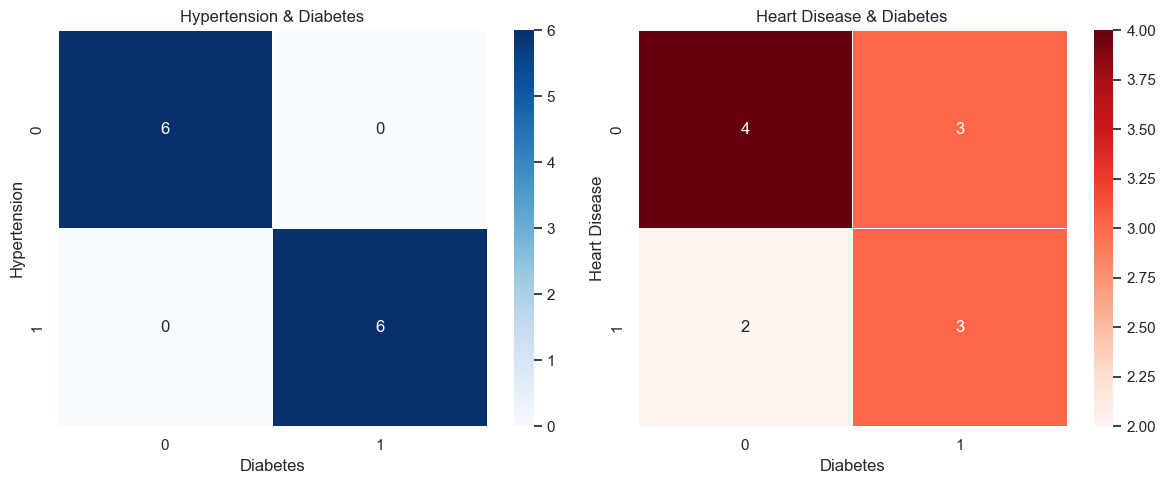

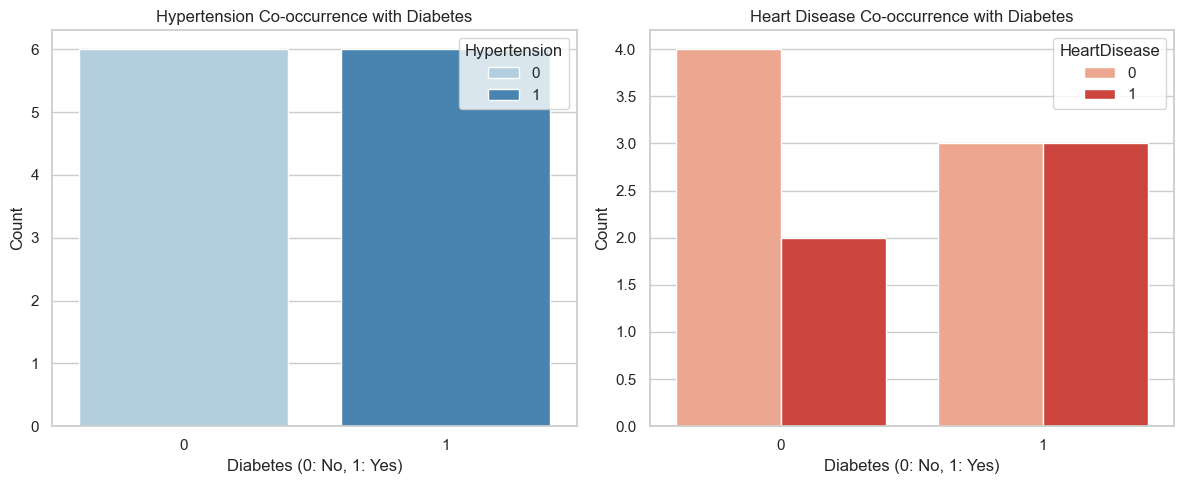

In [22]:
data = {
    'Hypertension': [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0],
    'HeartDisease': [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    'Diabetes': [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)
ht_diabetes = pd.crosstab(df['Hypertension'], df['Diabetes'])
hd_diabetes = pd.crosstab(df['HeartDisease'], df['Diabetes'])

print("Hypertension vs Diabetes:\n", ht_diabetes)
print("\nHeart Disease vs Diabetes:\n", hd_diabetes)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(ht_diabetes, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Hypertension & Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Hypertension')
plt.subplot(1, 2, 2)
sns.heatmap(hd_diabetes, annot=True, cmap='Reds', fmt='d', linewidths=0.5)
plt.title('Heart Disease & Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Heart Disease')

plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Diabetes', hue='Hypertension', data=df, palette='Blues')
plt.title("Hypertension Co-occurrence with Diabetes")
plt.xlabel("Diabetes (0: No, 1: Yes)")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
sns.countplot(x='Diabetes', hue='HeartDisease', data=df, palette='Reds')
plt.title("Heart Disease Co-occurrence with Diabetes")
plt.xlabel("Diabetes (0: No, 1: Yes)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

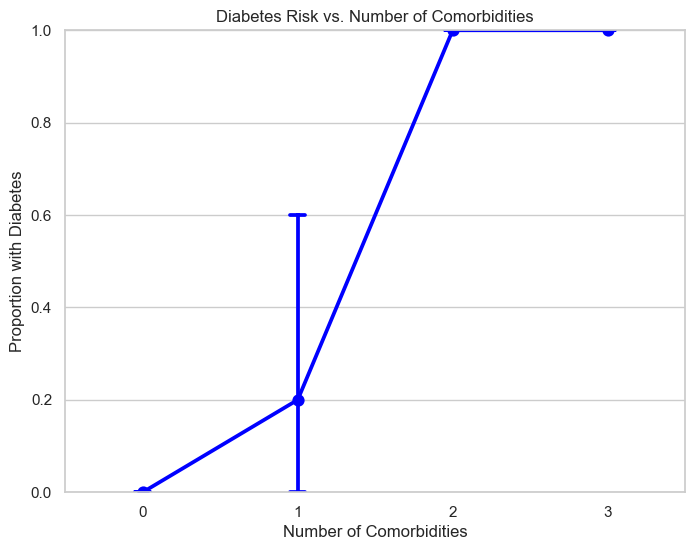

In [25]:
data = {
    'Hypertension':      [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1],
    'HeartDisease':      [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
    'HighCholesterol':   [0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0],
    'Diabetes':          [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(data)
df['Comorbidity_Count'] = df[['Hypertension', 'HeartDisease', 'HighCholesterol']].sum(axis=1)
plt.figure(figsize=(8, 6))
sns.pointplot(x='Comorbidity_Count', y='Diabetes', data=df, capsize=0.1, color='blue')
plt.title("Diabetes Risk vs. Number of Comorbidities")
plt.xlabel("Number of Comorbidities")
plt.ylabel("Proportion with Diabetes")
plt.ylim(0, 1)
plt.show()


### Gender and Health Outcome Disparities

Diabetes    No   Yes
Gender              
Female    0.20  0.80
Male      0.60  0.40
Other     0.75  0.25


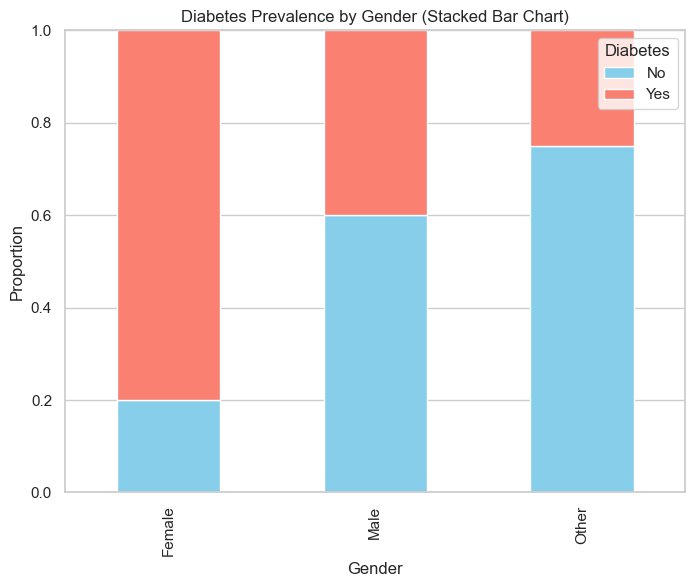

In [27]:
data = {
    'Gender': ['Female', 'Male', 'Other', 'Female', 'Male', 'Other', 
               'Female', 'Male', 'Other', 'Female', 'Male', 'Other', 'Male', 'Female'],
    'Diabetes': [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1]
}
df = pd.DataFrame(data)
table = pd.crosstab(df['Gender'], df['Diabetes'], normalize='index')
table.rename(columns={0: "No", 1: "Yes"}, inplace=True)
print(table)
table.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 6))
plt.title("Diabetes Prevalence by Gender (Stacked Bar Chart)")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Diabetes", loc='upper right')
plt.ylim(0, 1)
plt.show()


Permutation Test Results for Continuous Outcomes:
  BMI | Female vs Male: observed diff = 5.14, p-value = 0.001
  BMI | Female vs Other: observed diff = 2.88, p-value = 0.002
  BMI | Male vs Other: observed diff = 2.26, p-value = 0.003
  BloodGlucose | Female vs Male: observed diff = 18.00, p-value = 0.001
  BloodGlucose | Female vs Other: observed diff = 9.69, p-value = 0.010
  BloodGlucose | Male vs Other: observed diff = 8.31, p-value = 0.000
  HbA1c | Female vs Male: observed diff = 0.67, p-value = 0.000
  HbA1c | Female vs Other: observed diff = 0.29, p-value = 0.006
  HbA1c | Male vs Other: observed diff = 0.38, p-value = 0.000

Permutation Test Results for Diabetes Prevalence (Binary Outcome):
  Diabetes prevalence | Female vs Male: observed diff = 0.14, p-value = 1.000
  Diabetes prevalence | Female vs Other: observed diff = 0.24, p-value = 0.595
  Diabetes prevalence | Male vs Other: observed diff = 0.10, p-value = 1.000


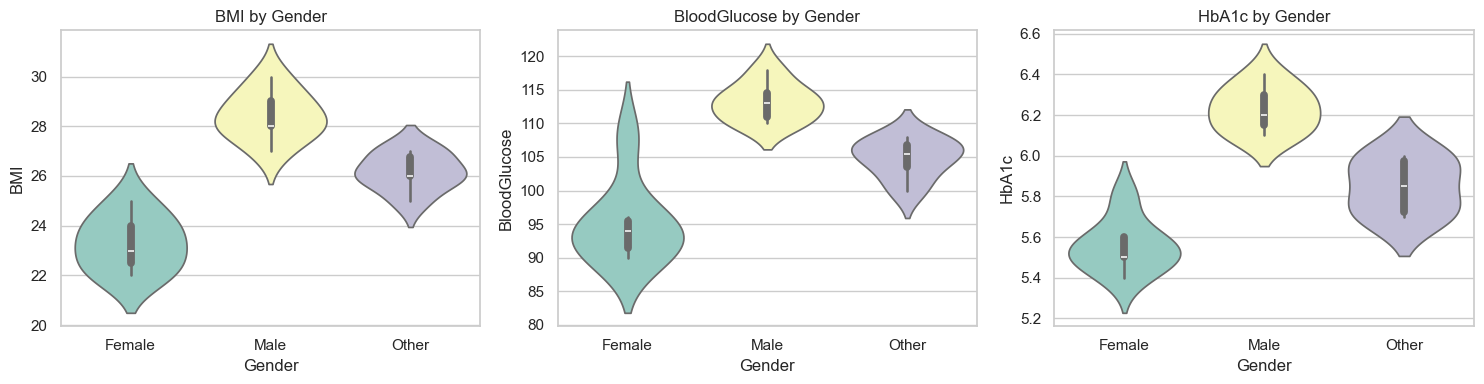

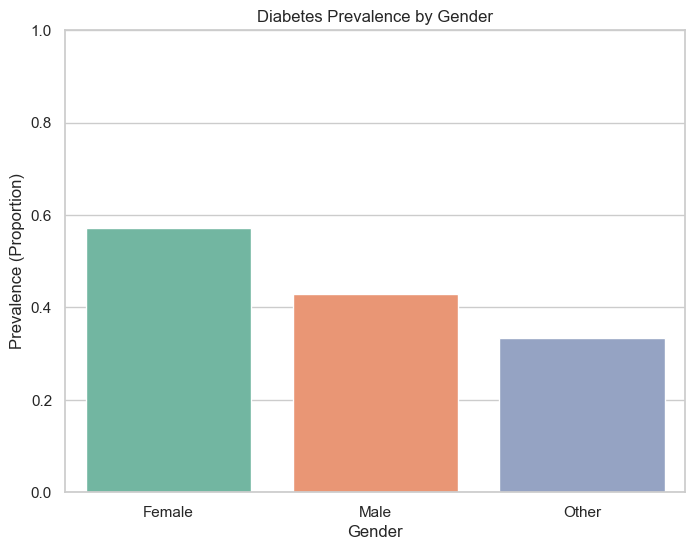

In [52]:
data = {
    'Gender': ['Female', 'Male', 'Other', 'Female', 'Male', 'Other', 
               'Female', 'Male', 'Other', 'Female', 'Male', 'Other', 
               'Male', 'Female', 'Female', 'Male', 'Other', 'Female', 'Male', 'Other'],
    'BMI': [22, 27, 25, 23, 28, 26, 24, 29, 27, 22, 30, 26, 28, 25, 23, 29, 27, 24, 28, 26],
    'BloodGlucose': [90, 110, 105, 95, 115, 100, 92, 112, 108, 94, 118, 103, 110, 108, 96, 114, 106, 91, 113, 107],
    'HbA1c': [5.5, 6.1, 5.8, 5.6, 6.2, 5.9, 5.4, 6.3, 5.7, 5.5, 6.4, 6.0, 6.1, 5.8, 5.6, 6.3, 5.7, 5.5, 6.2, 6.0],
    'Diabetes': [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1]  # Binary outcome: 0 = No, 1 = Yes
}
df = pd.DataFrame(data)

def permutation_test(group1, group2, n_permutations=10000):
    observed_diff = np.abs(np.mean(group1) - np.mean(group2))
    combined = np.concatenate([group1, group2])
    count = 0
    for _ in range(n_permutations):
        np.random.shuffle(combined)
        new_group1 = combined[:len(group1)]
        new_group2 = combined[len(group1):]
        diff = np.abs(np.mean(new_group1) - np.mean(new_group2))
        if diff >= observed_diff:
            count += 1
    p_value = count / n_permutations
    return observed_diff, p_value

def permutation_test_proportion(group1, group2, n_permutations=10000):
    observed_diff = np.abs(np.mean(group1) - np.mean(group2))
    combined = np.concatenate([group1, group2])
    count = 0
    for _ in range(n_permutations):
        np.random.shuffle(combined)
        new_group1 = combined[:len(group1)]
        new_group2 = combined[len(group1):]
        diff = np.abs(np.mean(new_group1) - np.mean(new_group2))
        if diff >= observed_diff:
            count += 1
    p_value = count / n_permutations
    return observed_diff, p_value

gender_pairs = [('Female', 'Male'), ('Female', 'Other'), ('Male', 'Other')]
continuous_outcomes = ['BMI', 'BloodGlucose', 'HbA1c']

print("Permutation Test Results for Continuous Outcomes:")
for outcome in continuous_outcomes:
    for g1, g2 in gender_pairs:
        group1 = df[df['Gender'] == g1][outcome].values
        group2 = df[df['Gender'] == g2][outcome].values
        diff, p = permutation_test(group1, group2)
        print(f"  {outcome} | {g1} vs {g2}: observed diff = {diff:.2f}, p-value = {p:.3f}")

print("\nPermutation Test Results for Diabetes Prevalence (Binary Outcome):")
for g1, g2 in gender_pairs:
    group1 = df[df['Gender'] == g1]['Diabetes'].values
    group2 = df[df['Gender'] == g2]['Diabetes'].values
    diff, p = permutation_test_proportion(group1, group2)
    print(f"  Diabetes prevalence | {g1} vs {g2}: observed diff = {diff:.2f}, p-value = {p:.3f}")
plt.figure(figsize=(15, 4))
for i, outcome in enumerate(continuous_outcomes):
    plt.subplot(1, 3, i+1)
    ax = sns.violinplot(x='Gender', y=outcome, data=df, hue='Gender', palette='Set3', dodge=False)
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    plt.title(f"{outcome} by Gender")
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
prevalence = df.groupby('Gender')['Diabetes'].mean().reset_index()
ax = sns.barplot(x='Gender', y='Diabetes', data=prevalence, hue='Gender', palette='Set2', dodge=False)
if ax.get_legend() is not None:
    ax.get_legend().remove()
plt.title("Diabetes Prevalence by Gender")
plt.xlabel("Gender")
plt.ylabel("Prevalence (Proportion)")
plt.ylim(0, 1)
plt.show()


### Anomaly Detection and Risk Stratification

BMI Outliers:
6    45.0
9    60.0
Name: BMI, dtype: float64
BMI Lower Bound: 11.50, Upper Bound: 39.50

Blood Glucose Outliers:
9    200
Name: BloodGlucose, dtype: int64
Blood Glucose Lower Bound: 48.75, Upper Bound: 158.75



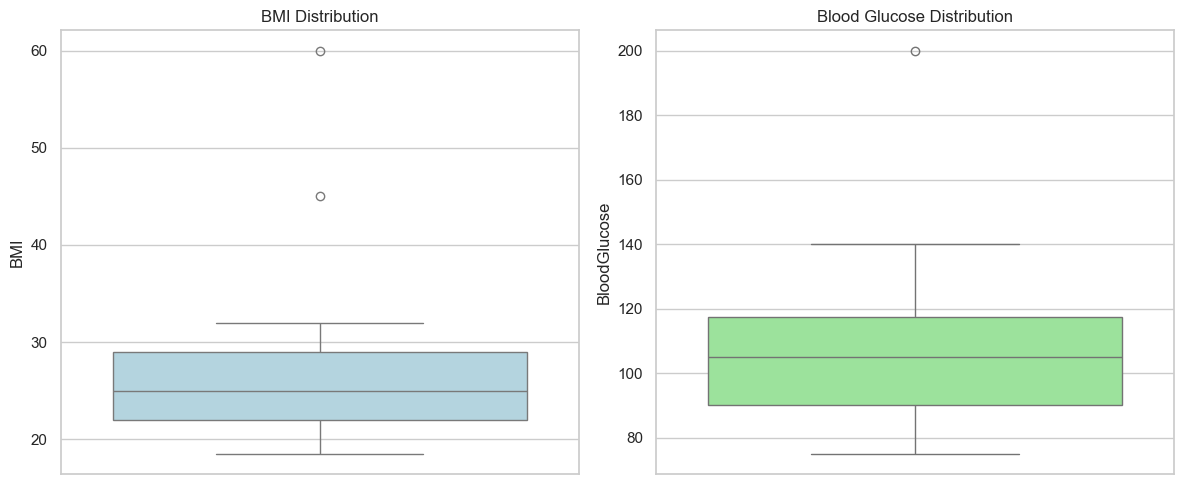

In [38]:
data = {
    'BMI': [18.5, 22, 24, 30, 32, 27, 45, 21, 19, 60, 22, 23, 25, 26, 28],
    'BloodGlucose': [80, 90, 100, 110, 95, 85, 120, 130, 140, 200, 75, 110, 105, 115, 90]
}
df = pd.DataFrame(data)

def identify_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound
bmi_outliers, bmi_lower, bmi_upper = identify_outliers(df['BMI'])
glucose_outliers, glucose_lower, glucose_upper = identify_outliers(df['BloodGlucose'])

print("BMI Outliers:")
print(bmi_outliers)
print(f"BMI Lower Bound: {bmi_lower:.2f}, Upper Bound: {bmi_upper:.2f}\n")

print("Blood Glucose Outliers:")
print(glucose_outliers)
print(f"Blood Glucose Lower Bound: {glucose_lower:.2f}, Upper Bound: {glucose_upper:.2f}\n")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['BMI'], color='lightblue')
plt.title("BMI Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['BloodGlucose'], color='lightgreen')
plt.title("Blood Glucose Distribution")

plt.tight_layout()
plt.show()


   Age  BMI  HbA1c  RiskScore    RiskProfile
0   25   22    5.5          0       Low Risk
1   45   27    6.2          3  Moderate Risk
2   65   32    7.5          6      High Risk
3   35   24    5.8          0       Low Risk
4   55   29    6.8          3  Moderate Risk
5   70   31    7.0          6      High Risk
6   60   30    7.2          6      High Risk
7   40   26    6.0          3  Moderate Risk
8   30   23    5.4          0       Low Risk
9   50   28    6.5          3  Moderate Risk


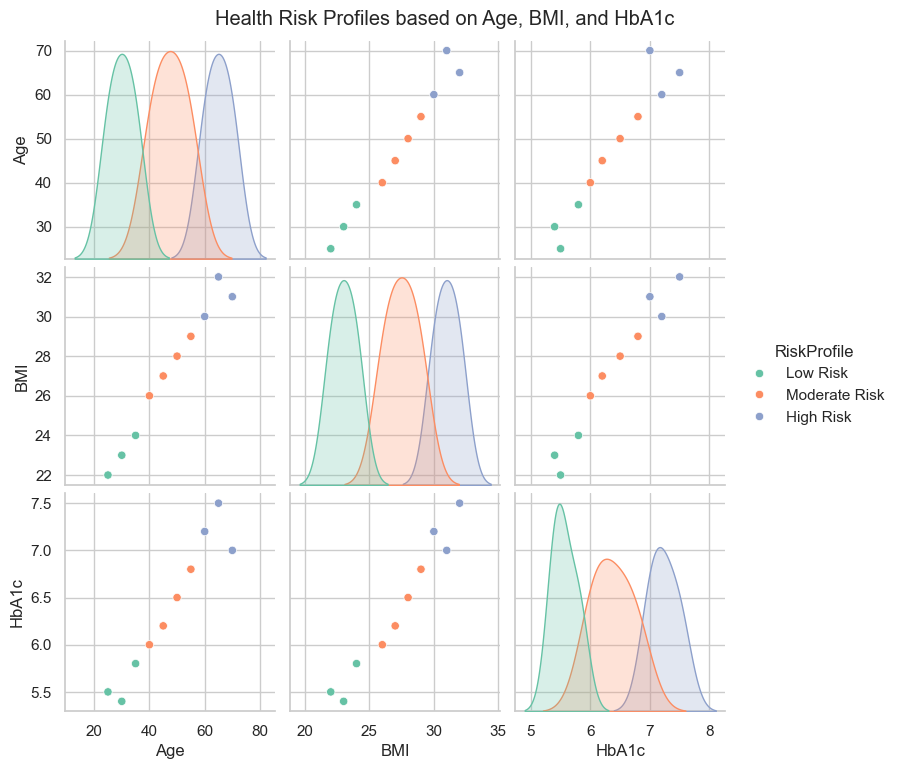

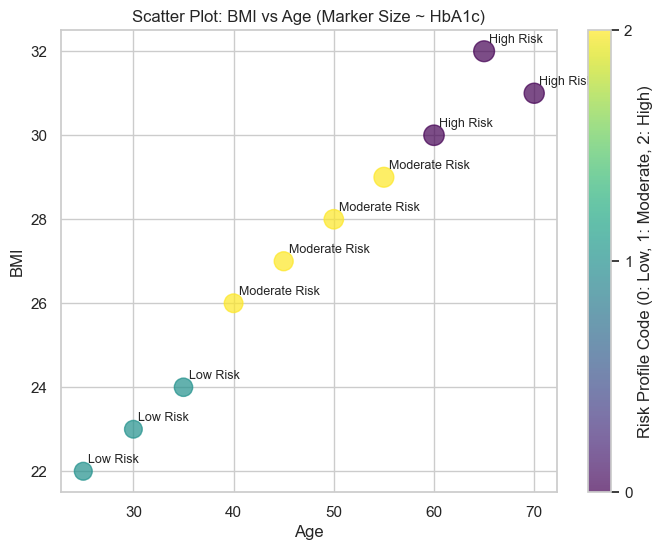

In [39]:
data = {
    'Age': [25, 45, 65, 35, 55, 70, 60, 40, 30, 50],
    'BMI': [22, 27, 32, 24, 29, 31, 30, 26, 23, 28],
    'HbA1c': [5.5, 6.2, 7.5, 5.8, 6.8, 7.0, 7.2, 6.0, 5.4, 6.5]
}
df = pd.DataFrame(data)
def compute_risk(row):
    risk = 0
    if row['Age'] >= 60:
        risk += 2
    elif row['Age'] >= 40:
        risk += 1
    if row['BMI'] >= 30:
        risk += 2
    elif row['BMI'] >= 25:
        risk += 1
    if row['HbA1c'] >= 7:
        risk += 2
    elif row['HbA1c'] >= 6:
        risk += 1
        
    return risk

df['RiskScore'] = df.apply(compute_risk, axis=1)
def risk_category(score):
    if score >= 5:
        return 'High Risk'
    elif score >= 3:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df['RiskProfile'] = df['RiskScore'].apply(risk_category)

print(df)
sns.pairplot(df, vars=['Age', 'BMI', 'HbA1c'], hue='RiskProfile', palette='Set2', diag_kind='kde')
plt.suptitle("Health Risk Profiles based on Age, BMI, and HbA1c", y=1.02)
plt.show()
plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Age'], df['BMI'], 
                      s=df['HbA1c']*30,  # scaling HbA1c for marker size
                      c=pd.Categorical(df['RiskProfile']).codes, 
                      cmap='viridis', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Scatter Plot: BMI vs Age (Marker Size ~ HbA1c)")
plt.colorbar(scatter, ticks=[0, 1, 2], label="Risk Profile Code (0: Low, 1: Moderate, 2: High)")
for i, row in df.iterrows():
    plt.text(row['Age']+0.5, row['BMI']+0.2, row['RiskProfile'], fontsize=9)
plt.show()


### Feature Engineering Opportunities

In [40]:
data = {
    'Age': [15, 22, 37, 41, 58, 62, 77, 33, 18, 45, 50, 66],
    'BMI': [16, 22, 28, 24, 31, 30, 26, 18, 15, 32, 27, 29]
}
df = pd.DataFrame(data)
age_bins = [0, 20, 40, 60, np.inf]
age_labels = ["0–20", "21–40", "41–60", "61+"]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
bmi_bins = [0, 18.5, 25, 30, np.inf]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese"]
df['BMICategory'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

print(df)


    Age  BMI AgeGroup  BMICategory
0    15   16     0–20  Underweight
1    22   22    21–40       Normal
2    37   28    21–40   Overweight
3    41   24    41–60       Normal
4    58   31    41–60        Obese
5    62   30      61+        Obese
6    77   26      61+   Overweight
7    33   18    21–40  Underweight
8    18   15     0–20  Underweight
9    45   32    41–60        Obese
10   50   27    41–60   Overweight
11   66   29      61+   Overweight


   BMI  HbA1c  BloodGlucose  CompositeRiskScore   RiskCategory
0   22    5.5            90                   0       Low Risk
1   27    6.0           110                   3  Moderate Risk
2   32    7.2           130                   6      High Risk
3   24    5.8            95                   1       Low Risk
4   29    6.5           120                   4  Moderate Risk
5   31    7.0           140                   6      High Risk
6   35    8.0           150                   6      High Risk
7   26    6.2           100                   3  Moderate Risk
8   28    6.8           115                   4  Moderate Risk
9   30    7.1           125                   5      High Risk


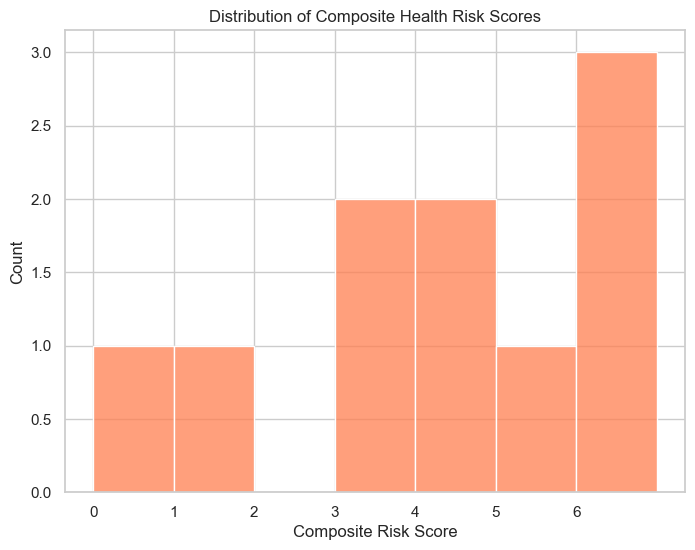

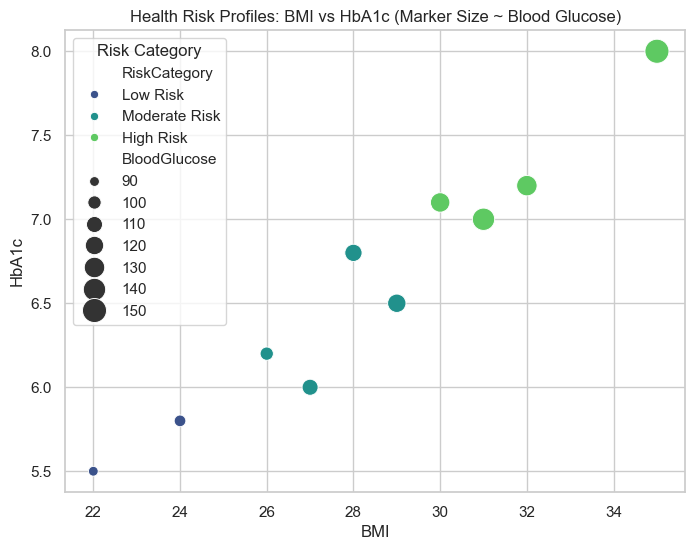

In [41]:
data = {
    'BMI': [22, 27, 32, 24, 29, 31, 35, 26, 28, 30],
    'HbA1c': [5.5, 6.0, 7.2, 5.8, 6.5, 7.0, 8.0, 6.2, 6.8, 7.1],
    'BloodGlucose': [90, 110, 130, 95, 120, 140, 150, 100, 115, 125]
}
df = pd.DataFrame(data)

def compute_risk_score(row):
    score = 0
    if row['BMI'] >= 30:
        score += 2
    elif row['BMI'] >= 25:
        score += 1
    if row['HbA1c'] >= 6.5:
        score += 2
    elif row['HbA1c'] >= 5.7:
        score += 1
    if row['BloodGlucose'] >= 126:
        score += 2
    elif row['BloodGlucose'] >= 100:
        score += 1

    return score

df['CompositeRiskScore'] = df.apply(compute_risk_score, axis=1)
def risk_category(score):
    if score >= 5:
        return 'High Risk'
    elif score >= 3:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df['RiskCategory'] = df['CompositeRiskScore'].apply(risk_category)

print(df)
plt.figure(figsize=(8, 6))
sns.histplot(df['CompositeRiskScore'], bins=range(0, 8), kde=False, color='coral')
plt.xlabel("Composite Risk Score")
plt.ylabel("Count")
plt.title("Distribution of Composite Health Risk Scores")
plt.xticks(range(0, 7))
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='HbA1c', size='BloodGlucose', hue='RiskCategory', data=df, palette='viridis', sizes=(50, 300))
plt.title("Health Risk Profiles: BMI vs HbA1c (Marker Size ~ Blood Glucose)")
plt.xlabel("BMI")
plt.ylabel("HbA1c")
plt.legend(title="Risk Category")
plt.show()


In [42]:
data = {
    'Age': [25, 45, 65, 35, 55, 70, 60, 40, 30, 50],
    'BMI': [22, 27, 32, 24, 29, 31, 30, 26, 23, 28],
    'HbA1c': [5.5, 6.0, 7.2, 5.8, 6.5, 7.0, 7.2, 6.1, 5.4, 6.3]
}
df = pd.DataFrame(data)
df['Age_BMI'] = df['Age'] * df['BMI']
df['BMI_HbA1c'] = df['BMI'] * df['HbA1c']

print(df)


   Age  BMI  HbA1c  Age_BMI  BMI_HbA1c
0   25   22    5.5      550      121.0
1   45   27    6.0     1215      162.0
2   65   32    7.2     2080      230.4
3   35   24    5.8      840      139.2
4   55   29    6.5     1595      188.5
5   70   31    7.0     2170      217.0
6   60   30    7.2     1800      216.0
7   40   26    6.1     1040      158.6
8   30   23    5.4      690      124.2
9   50   28    6.3     1400      176.4
